In [2]:
import numpy as np
import torch

import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize([0.5], [0.5]), # substract mean = 0.5 and std = 0.5 to transform from -1 to 1 instead of from 0 to 1
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [15]:
dataiter = iter(trainloader)
images, labels =  dataiter.next()

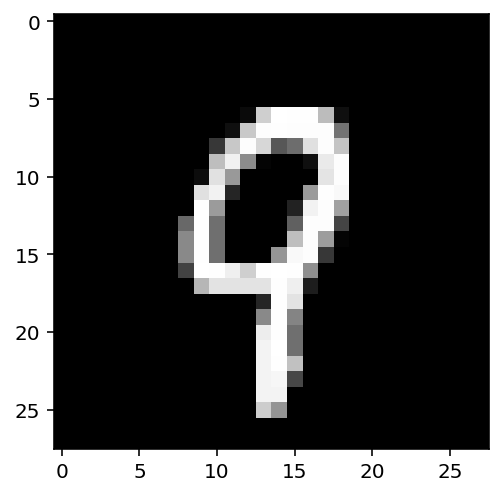

In [19]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')
plt.show()

## Building networks with PyTorch

Here I'll use PyTorch to build a simple feedfoward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the image.

<img src="assets/mlp_mnist.png" width=600px>

To build a neural network with PyTorch, you use the `torch.nn` module. The network itself is a class inheriting from `torch.nn.Module`. You define each of the operations separately, like `nn.Linear(784, 128)` for a fully connected linear layer with 784 inputs and 128 units.

The class needs to include a `forward` method that implements the forward pass through the network. In this method, you pass some input tensor `x` through each of the operations you defined earlier. The `torch.nn` module also has functional equivalents for things like ReLUs in `torch.nn.functional`. This module is usually imported as `F`. Then to use a ReLU activation on some layer (which is just a tensor), you'd do `F.relu(x)`. Below are a few different commonly used activation functions.

<img src="assets/activation.png" width=700px>

So, for this network, I'll build it with three fully connected layers, then a softmax output for predicting classes. The softmax function is similar to the sigmoid in that it squashes inputs between 0 and 1, but it's also normalized so that all the values sum to one like a proper probability distribution.

In [20]:
from torch import nn
import torch.nn.functional as F

In [27]:
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(28*28,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)

    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x,dim=1) # tensor is 64 [0] by 10 [1], so we want softmax for the 1st dimension to map 10 values

        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `model.fc1.weight` for instance.

In [28]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0030, -0.0051,  0.0003,  ..., -0.0295, -0.0137, -0.0009],
        [ 0.0097, -0.0119,  0.0246,  ...,  0.0136,  0.0080, -0.0093],
        [-0.0169, -0.0321, -0.0262,  ...,  0.0227, -0.0298,  0.0302],
        ...,
        [ 0.0134,  0.0206,  0.0278,  ..., -0.0182, -0.0102, -0.0077],
        [ 0.0018,  0.0128, -0.0199,  ...,  0.0133, -0.0221,  0.0153],
        [-0.0272,  0.0002, -0.0245,  ...,  0.0007,  0.0315,  0.0220]],
       requires_grad=True)
Parameter containing:
tensor([-2.4670e-02,  4.7158e-03,  2.2528e-02, -3.4260e-02,  2.3551e-02,
         4.8531e-03, -8.3479e-03,  1.8104e-02,  2.1638e-02, -1.3124e-02,
         1.9957e-03,  7.7463e-03,  2.3426e-02,  6.8745e-03, -1.7625e-02,
        -2.6167e-02, -3.4198e-03, -2.1745e-02,  2.1857e-02,  9.6597e-03,
         2.9361e-02,  1.0883e-02,  1.9870e-02, -3.0219e-02,  1.8525e-02,
         1.5045e-02,  1.3466e-02, -5.2255e-03, -3.2377e-02,  1.2569e-02,
         1.7474e-02, -2.9590e-02,  1.0840e-03,  1.8474e-0

For custom initialization, we want to modify these tensors in place. These are actually autograd *Variables*, so we need to get back the actual tensors with `model.fc1.weight.data`. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [29]:
# set all biases to 0
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
# sample from normal dist with std = 0.01

model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0075,  0.0017,  0.0201,  ..., -0.0139,  0.0030,  0.0082],
        [ 0.0060,  0.0129, -0.0195,  ..., -0.0002, -0.0052,  0.0084],
        [-0.0089,  0.0025,  0.0101,  ..., -0.0194,  0.0069,  0.0140],
        ...,
        [-0.0173, -0.0085, -0.0039,  ...,  0.0020, -0.0018,  0.0155],
        [ 0.0010, -0.0099,  0.0103,  ...,  0.0102, -0.0010,  0.0065],
        [ 0.0081, -0.0144,  0.0031,  ..., -0.0027, -0.0019, -0.0015]])

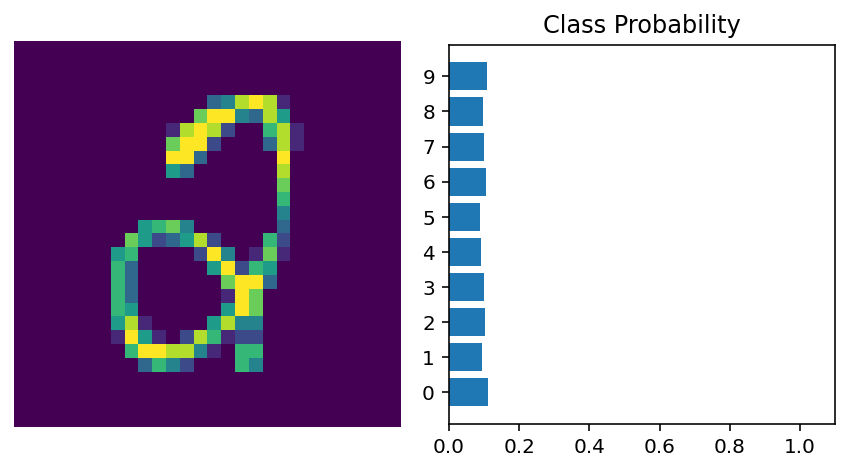

In [32]:
images, labels = next(iter(trainloader))

# images.resize_(64,1,784) # hardcode
images.resize_(images.shape[0],1,28 * 28)

ps = model.forward(images[0])

helper.view_classify(images[0].view(1,28,28),ps)

In [34]:
input_size = 784
hidden_size = [128,64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size,hidden_size[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_size[0],hidden_size[1]),
                    nn.ReLU(),
                    nn.Linear(hidden_size[1],output_size),
                    nn.Softmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [35]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_size[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_size[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [36]:
input_size = 784
hidden_size = [400,200,100]
output_size = 10

model = nn.Sequential(nn.Linear(input_size,hidden_size[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_size[0],hidden_size[1]),
                    nn.ReLU(),
                    nn.Linear(hidden_size[1],hidden_size[2]),
                    nn.ReLU(),
                    nn.Linear(hidden_size[2],output_size),
                    nn.Softmax(dim=1)
                    )

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
  (7): Softmax(dim=1)
)


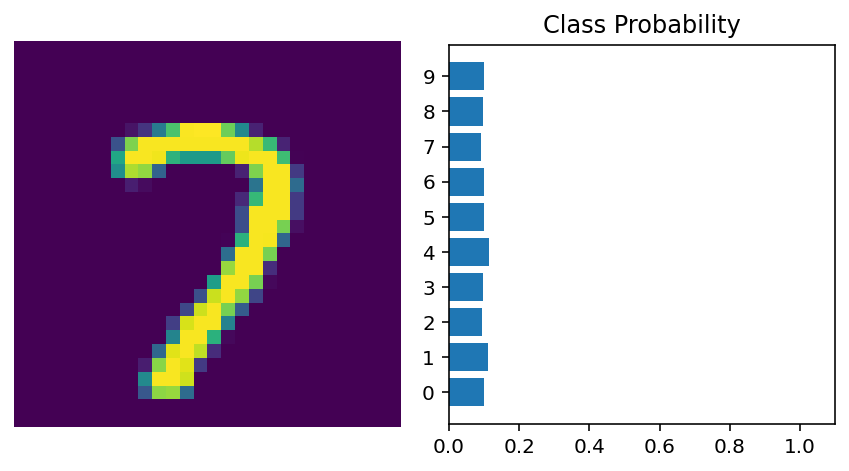

In [40]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0],1,784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28),ps)

# Training Neural Networks

The network we built in the previous part isn't so smart, it doesn't know anything about our handwritten digits. Neural networks with non-linear activations work like universal function approximators. There is some function that maps your input to the output. For example, images of handwritten digits to class probabilities. The power of neural networks is that we can train them to approximate this function, and basically any function given enough data and compute time.

<img src="assets/function_approx.png" width=500px>

At first the network is naive, it doesn't know the function mapping the inputs to the outputs. We train the network by showing it examples of real data, then adjusting the network parameters such that it approximates this function.

To find these parameters, we need to know how poorly the network is predicting the real outputs. For this we calculate a **loss function** (also called the cost), a measure of our prediction error. For example, the mean squared loss is often used in regression and binary classification problems

$$
\ell = \frac{1}{2n}\sum_i^n{\left(y_i - \hat{y}_i\right)^2}
$$

where $n$ is the number of training examples, $y_i$ are the true labels, and $\hat{y}_i$ are the predicted labels.

By minimizing this loss with respect to the network parameters, we can find configurations where the loss is at a minimum and the network is able to predict the correct labels with high accuracy. We find this minimum using a process called **gradient descent**. The gradient is the slope of the loss function and points in the direction of fastest change. To get to the minimum in the least amount of time, we then want to follow the gradient (downwards). You can think of this like descending a mountain by following the steepest slope to the base.

<img src='assets/gradient_descent.png' width=350px>

## Backpropagation

For single layer networks, gradient descent is simple to implement. However, it's more complicated for deeper, multilayer neural networks like the one we've built. Complicated enough that it took about 30 years before researchers figured out how to train multilayer networks, although it's straightforward once you learn about it.

This is done through **backpropagation** which is really just an application of the chain rule from calculus. It's easiest to understand if we convert a two layer network into a graph representation.

<img src='assets/w1_backprop_graph.png' width=400px>

In the forward pass through the network, our data and operations go from right to left here. To train the weights with gradient descent, we propagate the gradient of the cost backwards through the network. Mathematically, this is really just calculating the gradient of the loss with respect to the weights using the chain rule.

$$
\frac{\partial \ell}{\partial w_1} = \frac{\partial l_1}{\partial w_1} \frac{\partial s}{\partial l_1} \frac{\partial l_2}{\partial s} \frac{\partial \ell}{\partial l_2}
$$

We update our weights using this gradient with some learning rate $\alpha$.

$$
w^\prime = w - \alpha \frac{\partial \ell}{\partial w}
$$

The learning rate is set such that the weight update steps are small enough that the iterative method settles in a minimum.

The first thing we need to do for training is define our loss function. In PyTorch, you'll usually see this as `criterion`. Here we're using softmax output, so we want to use `criterion = nn.CrossEntropyLoss()` as our loss. Later when training, you use `loss = criterion(output, targets)` to calculate the actual loss.

We also need to define the optimizer we're using, SGD or Adam, or something along those lines. Here I'll just use SGD with `torch.optim.SGD`, passing in the network parameters and the learning rate.

In [41]:
from torch import optim
import time

In [42]:
x = torch.rand(2,2,requires_grad=True)
x

tensor([[0.3400, 0.4133],
        [0.5679, 0.0860]], requires_grad=True)

In [43]:
y = x**2
y

tensor([[0.1156, 0.1709],
        [0.3225, 0.0074]], grad_fn=<PowBackward0>)

In [44]:
print(y.grad_fn)

In [45]:
z = y.mean()
z

tensor(0.1541, grad_fn=<MeanBackward0>)

In [47]:
print(x.grad)

None


In [48]:
z.backward()
print(x.grad)

tensor([[0.1700, 0.2067],
        [0.2839, 0.0430]])


In [50]:
print(x/2)

tensor([[0.1700, 0.2067],
        [0.2839, 0.0430]], grad_fn=<DivBackward0>)


In [69]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[1], output_size))]))

In [70]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [56]:
print('Before',model.fc1.weight)
images,labels = next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output,labels)
loss.backward()
print('Gradient - ', model.fc1.weight.grad)
optimizer.step()

Before Parameter containing:
tensor([[-1.6082e-02,  3.4021e-02, -3.5569e-02,  ...,  1.8623e-03,
         -1.0376e-02, -1.4039e-02],
        [ 1.1276e-02,  1.5598e-02, -2.6264e-02,  ..., -2.8833e-03,
          3.5662e-03,  1.4225e-02],
        [-2.8639e-02,  9.6742e-05, -2.8954e-02,  ..., -6.3834e-03,
          2.3261e-02, -1.8094e-02],
        ...,
        [-1.9621e-02,  2.0142e-02, -2.3396e-02,  ...,  4.4391e-03,
          2.1283e-02,  2.6446e-02],
        [-1.5662e-02,  1.6612e-02,  1.3158e-02,  ...,  2.2870e-02,
         -3.9667e-03, -6.5352e-03],
        [ 1.9086e-02,  1.4755e-02,  1.3331e-02,  ..., -1.2739e-02,
         -1.4066e-02, -1.8508e-02]], requires_grad=True)
Gradient -  tensor([[-9.3381e-06, -9.3381e-06, -9.3381e-06,  ..., -9.3381e-06,
         -9.3381e-06, -9.3381e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 2.0363e-04,  2.0363e-04,  2.0363e-04,  ...,  2.0363e-04,
          2.0363e-04,  2.0363e-04]

In [54]:
print('updated weights - ', model.fc1.weight)

updated weights -  Parameter containing:
tensor([[-1.6082e-02,  3.4021e-02, -3.5569e-02,  ...,  1.8623e-03,
         -1.0376e-02, -1.4039e-02],
        [ 1.1276e-02,  1.5598e-02, -2.6264e-02,  ..., -2.8833e-03,
          3.5662e-03,  1.4225e-02],
        [-2.8639e-02,  9.6742e-05, -2.8954e-02,  ..., -6.3834e-03,
          2.3261e-02, -1.8094e-02],
        ...,
        [-1.9621e-02,  2.0142e-02, -2.3396e-02,  ...,  4.4391e-03,
          2.1283e-02,  2.6446e-02],
        [-1.5662e-02,  1.6612e-02,  1.3158e-02,  ...,  2.2870e-02,
         -3.9667e-03, -6.5352e-03],
        [ 1.9086e-02,  1.4755e-02,  1.3331e-02,  ..., -1.2739e-02,
         -1.4066e-02, -1.8508e-02]], requires_grad=True)


In [60]:
images.size()[0]

64

In [71]:
epochs = 3

print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0

    for images , labels in trainloader:
        steps += 1
        images.resize_(images.size()[0],784)

        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))

            running_loss = 0

Epoch: 1/3...  Loss: 2.2602
Epoch: 1/3...  Loss: 2.1857
Epoch: 1/3...  Loss: 2.0906
Epoch: 1/3...  Loss: 1.9618
Epoch: 1/3...  Loss: 1.7882
Epoch: 1/3...  Loss: 1.5674
Epoch: 1/3...  Loss: 1.3531
Epoch: 1/3...  Loss: 1.1440
Epoch: 1/3...  Loss: 1.0080
Epoch: 1/3...  Loss: 0.8699
Epoch: 1/3...  Loss: 0.7919
Epoch: 1/3...  Loss: 0.7155
Epoch: 1/3...  Loss: 0.6681
Epoch: 1/3...  Loss: 0.6407
Epoch: 1/3...  Loss: 0.5983
Epoch: 1/3...  Loss: 0.5731
Epoch: 1/3...  Loss: 0.5275
Epoch: 1/3...  Loss: 0.5231
Epoch: 1/3...  Loss: 0.5162
Epoch: 1/3...  Loss: 0.4794
Epoch: 1/3...  Loss: 0.4736
Epoch: 1/3...  Loss: 0.4835
Epoch: 1/3...  Loss: 0.4580
Epoch: 2/3...  Loss: 0.2498
Epoch: 2/3...  Loss: 0.4528
Epoch: 2/3...  Loss: 0.4254
Epoch: 2/3...  Loss: 0.4197
Epoch: 2/3...  Loss: 0.4366
Epoch: 2/3...  Loss: 0.4220
Epoch: 2/3...  Loss: 0.4123
Epoch: 2/3...  Loss: 0.3954
Epoch: 2/3...  Loss: 0.3858
Epoch: 2/3...  Loss: 0.3713
Epoch: 2/3...  Loss: 0.3940
Epoch: 2/3...  Loss: 0.4169
Epoch: 2/3...  Loss:

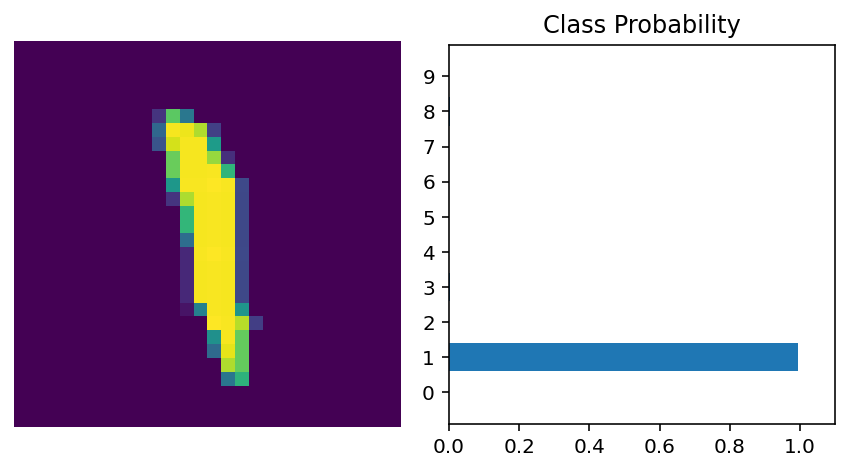

In [78]:
images,abels = next(iter(trainloader))

img =  images[0].view(1,28*28)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1,28,28),ps)